In [4]:
### READ RESULTS INTO PANDAS DATAFRAME
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

resultsdir = "../../../ae-results/"
# list all directories in resultsdir
#configs = [d for d in os.listdir(resultsdir) if os.path.isdir(os.path.join(resultsdir, d))]
configs = ['Baseline.yaml',
            "CoMeT125-1-128-128.yaml",
            "CoMeT125-1-256-128.yaml",
            "CoMeT125-1-512-128.yaml",
            "CoMeT125-1-1024-128.yaml",
            "CoMeT125-1-2048-128.yaml",
            "CoMeT125-2-128-128.yaml",
            "CoMeT125-2-256-128.yaml",
            "CoMeT125-2-512-128.yaml",
            "CoMeT125-2-1024-128.yaml",
            "CoMeT125-2-2048-128.yaml",
            "CoMeT125-4-128-128.yaml",
            "CoMeT125-4-256-128.yaml",
            "CoMeT125-4-512-128.yaml",
            "CoMeT125-4-1024-128.yaml",
            "CoMeT125-4-2048-128.yaml",
            "CoMeT125-8-128-128.yaml",
            "CoMeT125-8-256-128.yaml",
            "CoMeT125-8-512-128.yaml",
            "CoMeT125-8-1024-128.yaml",
            "CoMeT125-8-2048-128.yaml",
            "CoMeT125-16-128-128.yaml",
            "CoMeT125-16-256-128.yaml",
            "CoMeT125-16-512-128.yaml",
            "CoMeT125-16-1024-128.yaml",
            "CoMeT125-16-2048-128.yaml",
        ]
#configs = ['Baseline.yaml', 'CMS1000-100.yaml', 'Graphene1000.yaml', 'CMS1000-100-c.yaml']
# print found configs
print('Found configs: {}'.format(configs))
# list all directories under all configs
workloads = []
for c in configs:
    workloads.append([d for d in os.listdir(os.path.join(resultsdir, c)) if os.path.isdir(os.path.join(resultsdir, c, d))])
# find only the intersection of all workloads
workloads = list(set.intersection(*map(set, workloads)))
# print found workloads
print('Found workloads: {}'.format(workloads))

stats_per_config_workload = []

# for every config + workload directory
for c in configs:
    for w in workloads:
        # find all files in the directory
        files = [f for f in os.listdir(os.path.join(resultsdir, c, w)) if os.path.isfile(os.path.join(resultsdir, c, w, f))]
        # find the stats file
        stat_files = [f for f in files if f.endswith('.stats')]
        # if there is a stats file
        if stat_files:
            for stat_file in stat_files:
                # if the stats_file has less than three lines skip it
                if len(open(os.path.join(resultsdir, c, w, stat_file)).readlines()) < 3:
                    continue
                
                # print the name of the stats_file
                print('Found stats file: {}'.format(os.path.join(os.path.join(resultsdir, c, w, stat_file))))

                extension = ''
                # if stats_file file name itself does not start with DDR4, parse it a bit
                if not stat_file.startswith('DDR4'):
                    # get the config name from the stats_file name
                    extension = '_'.join(stat_file.split('_')[:-1])
                    # prepend underscore to extension
                    extension = '_' + extension

                # read the stats file, name columns: 'name', 'value', 'description'
                df = pd.read_csv(os.path.join(resultsdir, c, w, stat_file), header=None).T
                df.columns = df.iloc[0]
                df.drop(0,inplace=True)
                # add a new column called 'config' with the config name
                df['config'] = c + extension
                # add a new column called 'workload' with the workload name
                df['workload'] = w
                # print the stats file
                # print('Config: {}, Workload: {}, Stats: {}'.format(c, w, df))
                # append the stats to the list
                df.reset_index(inplace=True, drop=True)
                stats_per_config_workload.append(df)
        else:
            print('Config: {}, Workload: {}, Stats: No stats file found'.format(c, w))

# concatenate all stats into one dataframe
stats = pd.concat(stats_per_config_workload)

# find elements where workload does not contain '-'
# these are multi core workloads
stats = stats[~stats['workload'].str.contains('-')]

# remove these two workloads: stream_10.trace and random_10.trace
stats = stats[~stats['workload'].isin(['stream10_200.trace', 'random10_200.trace'])]
# also from workloads
workloads = [w for w in workloads if not w in ['stream10_200', 'random10_200.trace']]

#remove configs that has RH32, AH and AAH in the name
stats = stats[~stats['config'].str.contains('RH32')]
stats = stats[~stats['config'].str.contains('AH')]
stats = stats[~stats['config'].str.contains('AAH')]

# replace 'Baseline' with 'Baseline0'
stats['config'] = stats['config'].str.replace('ae-results/', '')
stats['config'] = stats['config'].str.replace('../results/', '')
stats['config'] = stats['config'].str.replace('Baseline', 'Baseline0')

# add a new column that stores in integer the number in the config name
stats['nrh'] = stats['config'].str.extract('(\d+)').astype(int)

# remove numbers from config names
stats['config'] = stats['config'].str.replace('\d+', '')

# remove yaml from config names
stats['config'] = stats['config'].str.replace('.yaml', '')

print(stats['workload'].unique())
stats_copy = stats.copy()


Found configs: ['Baseline.yaml', 'CoMeT125-1-128-128.yaml', 'CoMeT125-1-256-128.yaml', 'CoMeT125-1-512-128.yaml', 'CoMeT125-1-1024-128.yaml', 'CoMeT125-1-2048-128.yaml', 'CoMeT125-2-128-128.yaml', 'CoMeT125-2-256-128.yaml', 'CoMeT125-2-512-128.yaml', 'CoMeT125-2-1024-128.yaml', 'CoMeT125-2-2048-128.yaml', 'CoMeT125-4-128-128.yaml', 'CoMeT125-4-256-128.yaml', 'CoMeT125-4-512-128.yaml', 'CoMeT125-4-1024-128.yaml', 'CoMeT125-4-2048-128.yaml', 'CoMeT125-8-128-128.yaml', 'CoMeT125-8-256-128.yaml', 'CoMeT125-8-512-128.yaml', 'CoMeT125-8-1024-128.yaml', 'CoMeT125-8-2048-128.yaml', 'CoMeT125-16-128-128.yaml', 'CoMeT125-16-256-128.yaml', 'CoMeT125-16-512-128.yaml', 'CoMeT125-16-1024-128.yaml', 'CoMeT125-16-2048-128.yaml']
Found workloads: ['grep_map0', '481.wrf', 'bfs_ny', '403.gcc', '437.leslie3d', '434.zeusmp', 'bfs_cm2003', '541.leela', '531.deepsjeng', '508.namd', '429.mcf', '544.nab', '549.fotonik3d', 'ycsb_aserver', 'jp2_encode', 'jp2_decode', '433.milc', '444.namd', 'ycsb_cserver', '458.

In [5]:





# use seaborn-deep style
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
sns.set_palette("pastel", n_colors=4)

stats = stats_copy.copy()



# instructions per cycle (IPC) is record_cycles_insts_0 / record_cycs_core_0
stats['ramulator.ipc'] = stats['ramulator.record_insts_core_0'] / stats['ramulator.record_cycs_core_0']


stats['ramulator.rbmpki'] = (stats['ramulator.row_conflicts_channel_0_core'] + stats['ramulator.row_misses_channel_0_core']) /\
                            stats['ramulator.record_insts_core_0'] * 1000


# copy the IPC of the baseline config as to all configs
baseline = stats[stats['config'] == 'Baseline0']
baseline = baseline[['workload', 'ramulator.ipc', 'ramulator.read_latency_avg_0', 'ramulator.rbmpki', 'ramulator.window_full_stall_cycles_core_0']]
# baseline
baseline.columns = ['workload', 'ramulator.baseline_ipc', 'ramulator.baseline_read_latency_avg_0', 'ramulator.baseline_rbmpki', 'ramulator.baseline_stall_cycles']
print('baseline:')
print(baseline)

stats = pd.merge(stats, baseline, on='workload')


#hydra baseline
# hydra_baseline = stats[stats['config'] == 'Hydra-Baseline']
# hydra_baseline = hydra_baseline[['workload', 'ramulator.ipc']]
# # hydra_baseline
# hydra_baseline.columns = ['workload', 'ramulator.hydra_baseline_ipc']
# stats = pd.merge(stats, hydra_baseline, on='workload')

stats['ramulator.normalized_ipc'] = stats['ramulator.ipc'] / stats['ramulator.baseline_ipc']
stats['ramulator.normalized_read_latency'] = stats['ramulator.read_latency_avg_0'] / stats['ramulator.baseline_read_latency_avg_0']
stats['ramulator.normalized_stall_cycles'] = stats['ramulator.window_full_stall_cycles_core_0'] / stats['ramulator.baseline_stall_cycles']
stats['ramulator.normalized_rbmpki'] = stats['ramulator.rbmpki'] / stats['ramulator.baseline_rbmpki']


# normalized ipc for hydra is not correct, so we overwrite it with the correct value
# stats.loc[stats['config'].str.contains('Hydra'), 'ramulator.normalized_ipc'] = stats['ramulator.ipc'] / stats['ramulator.hydra_baseline_ipc']

# add the geometric normalized ipc average as a new workload to every config
geometric_mean = stats.groupby(['config','nrh'])['ramulator.normalized_ipc'].apply(lambda x: x.prod()**(1.0/len(x))).reset_index()
geometric_mean['workload'] = 'GeoMean'

#print(stats['config'])


stats = pd.concat([stats, geometric_mean])
print(stats['config'])
print(stats['workload'])

baseline:
        workload ramulator.baseline_ipc ramulator.baseline_read_latency_avg_0  \
0      grep_map0               3.805131                            128.320076   
0        481.wrf               3.959813                               41.2593   
0         bfs_ny               0.255282                            180.842328   
0        403.gcc               3.878083                             62.851825   
0   437.leslie3d               0.972028                               81.4277   
..           ...                    ...                                   ...   
0    h264_encode               3.998659                            106.888889   
0    520.omnetpp               1.295571                             75.709627   
0    435.gromacs               3.482044                             41.062063   
0      456.hmmer               3.733412                             48.718449   
0          tpch2               1.525505                             76.756783   

   ramulator.base

In [6]:
stats_clean = stats.copy()

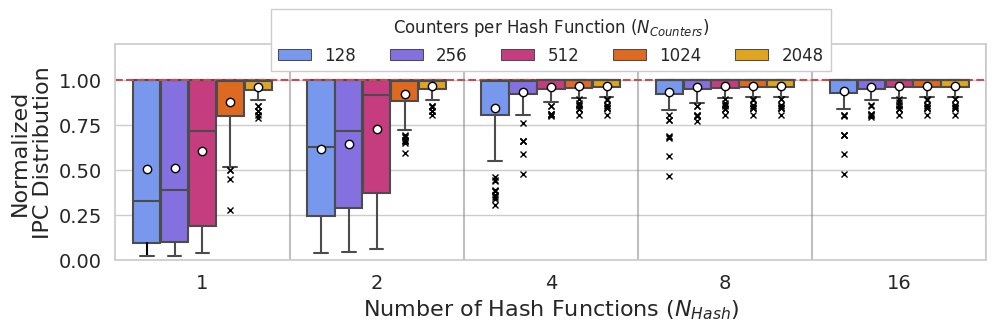

In [7]:
import re

stats_sweep = stats_clean.copy()
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
#sns.set_palette("viridis", n_colors=5)

# sns set color palette
comet_palette = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']
sns.set_palette(comet_palette, n_colors=5)

#print(stats_sweep['config'].unique())
# new dataframe that does not have the baseline configs
stats_no_baseline = stats_sweep[~stats_sweep['config'].str.contains('Baseline0')]
# keep only the configs that have CMS in the name
stats_sweep = stats_sweep[stats_sweep['config'].str.contains('CoMeT')]

stats_no_baseline['counters'] = stats_no_baseline['config'].apply(lambda x: int(re.search(r'CoMeT125-\d+-(\d+)-\d+', x).group(1)) if re.search(r'CoMeT125-\d+-(\d+)-\d+', x) else 0)
stats_no_baseline['hashes'] = stats_no_baseline['config'].apply(lambda x: int(re.search(r'CoMeT125-(\d+)-\d+-\d+', x).group(1)) if re.search(r'CoMeT125-(\d+)-\d+-\d+', x) else 0)

# order nRH from high to low
stats_no_baseline['counters'] = pd.Categorical(stats_no_baseline['counters'], categories=[128,256,512,1024,2048], ordered=True)

stats_no_baseline['hashes'] = pd.Categorical(stats_no_baseline['hashes'], categories=[1,2,4,8,16], ordered=True)

# drop entries with empty config
stats_no_baseline = stats_no_baseline[stats_no_baseline['config'].notna()]

#boxplot of normalized IPC
fig, ax = plt.subplots(figsize=(10, 3.6))
# show mean values as well
ax = sns.boxplot(x="hashes", y="ramulator.normalized_ipc", hue="counters", data=stats_no_baseline, showmeans=True, 
                 meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"}, showfliers=True, 
                 flierprops={'marker': 'x', 'markerfacecolor': 'black', 'markeredgecolor': 'black'})
ax.set_xlabel('Number of Hash Functions ($N_{Hash}$)')
ax.set_ylabel('Normalized\nIPC Distribution')
# draw a red line at y = 1.0, label it as baseline IPC
ax.axhline(y=1.0, color='r', linestyle='--')
# write above the red line 'baseline IPC'
#ax.text(0.02, 0.91, 'baseline IPC', color='#e74c3c', transform=ax.transAxes, fontsize=15)
# extend the y axis to 1.2
ax.set_ylim(0, 1.2)
# color the 5th y tick red
ax.get_yticklabels()[5].set_color('#e74c3c')
# make axis tick font bigger
ax.tick_params(axis='both', which='major', labelsize=14)
# draw vertical lines to separate the rowhammer threshold values
ax.axvline(x=0.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=1.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=2.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=3.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=4.5, color='grey', linestyle='-', alpha=0.5)
# make x and y axis labels bigger
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)

# Customize the whiskers and borders
ax.lines[0].set_color('black')  # Set the color of the whiskers\

# put the legend on top of the plot
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, fancybox=True, shadow=True, fontsize=12)
# add legend title as "counters per hash"
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=20, fancybox=False, shadow=False, fontsize=12, title_fontsize=12, title='Counters per Hash Function ($N_{Counters}$)', framealpha=1)

plt.tight_layout()
plt.show()

# save figure
fig.savefig('cometsweep125.pdf', bbox_inches='tight')
# export data to csv
stats_no_baseline.to_csv('cometsweep125.csv', index=False)

# list mean normalized_ipc at 1000 nRH for all configs

In [8]:
# create a subset of the dataframe that only contains workload, config, nrh, normalized_ipc
stats_no_baseline_subset = stats_no_baseline[['workload', 'config', 'nrh', 'ramulator.normalized_ipc']]

# dump only comet125-4-512-128 normalized ipcs to csv


In [9]:
# print the number of workloads per config
print(stats_no_baseline_subset.groupby(['config'])['workload'].count())

config
CoMeT125-1-1024-128     62
CoMeT125-1-128-128      60
CoMeT125-1-2048-128     62
CoMeT125-1-256-128      62
CoMeT125-1-512-128      62
CoMeT125-16-1024-128    62
CoMeT125-16-128-128     62
CoMeT125-16-2048-128    62
CoMeT125-16-256-128     62
CoMeT125-16-512-128     62
CoMeT125-2-1024-128     62
CoMeT125-2-128-128      62
CoMeT125-2-2048-128     62
CoMeT125-2-256-128      62
CoMeT125-2-512-128      62
CoMeT125-4-1024-128     62
CoMeT125-4-128-128      62
CoMeT125-4-2048-128     62
CoMeT125-4-256-128      62
CoMeT125-4-512-128      62
CoMeT125-8-1024-128     62
CoMeT125-8-128-128      62
CoMeT125-8-2048-128     62
CoMeT125-8-256-128      62
CoMeT125-8-512-128      62
Name: workload, dtype: int64
